# 線形回帰モデル - pymc3

In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
#plt.style.use('ggplot')
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

np.random.seed(1234)
import pymc3 as pm
import scipy.stats as stats

import logging
_logger = logging.getLogger("theano.gof.compilelock")
_logger.setLevel(logging.ERROR)

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled)


## 線形回帰モデルのパラメータ推定

普通の伝統的な統計学では以下の線形回帰式を用いて回帰パラメータ$a$, $b$を推定する．

$$
y \sim ax + b
$$

確率論的プログラミングにおいては，，

$$y = ax + b + \epsilon$$

という線型モデルを次の形式に解釈することでモデリングを行う．

$$
y \sim \mathcal{N}(ax + b, \sigma^2)
$$

推定するパラメータは$a$, $b$ と $\sigma$で，それぞれの事前分布は次のように決めるとする．

$$
a \sim \mathcal{N}(0, 100) \\
b \sim \mathcal{N}(0, 100) \\
\sigma \sim \mathcal{U}(0, 20)
$$

 [-----------------100%-----------------] 1000 of 1000 complete in 0.8 sec

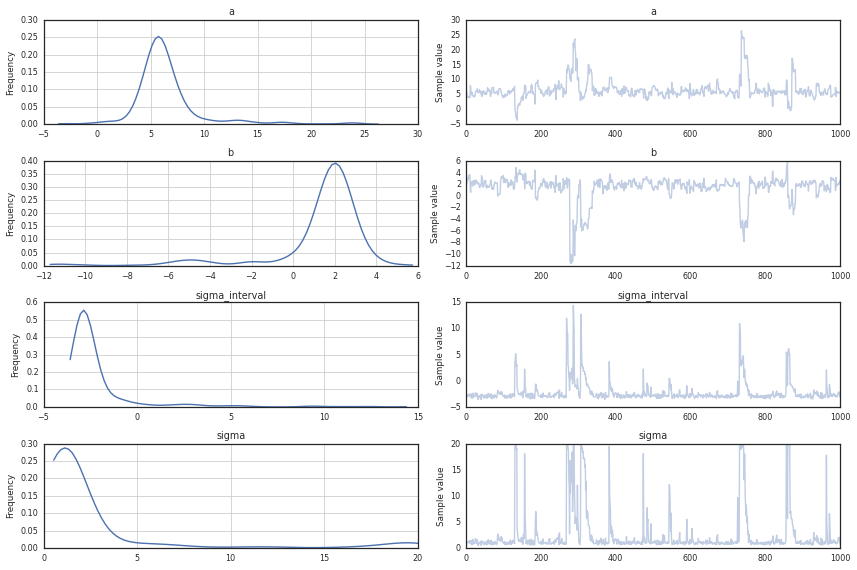

In [3]:
# observed data
n = 11
_a = 6
_b = 2
x = np.linspace(0, 1, n)
y = _a*x + _b + np.random.randn(n)

niter = 1000
with pm.Model() as model:
    a = pm.Normal('a', mu=0, sd=20)
    b = pm.Normal('b', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=20)
    
    y_est = a*x + b # simple auxiliary variables
    
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    # inference
    start = pm.find_MAP()
    step = pm.NUTS() # Hamiltonian MCMC with No U-Turn Sampler
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    pm.traceplot(trace);

 [-----------------100%-----------------] 2000 of 2000 complete in 1.6 sec

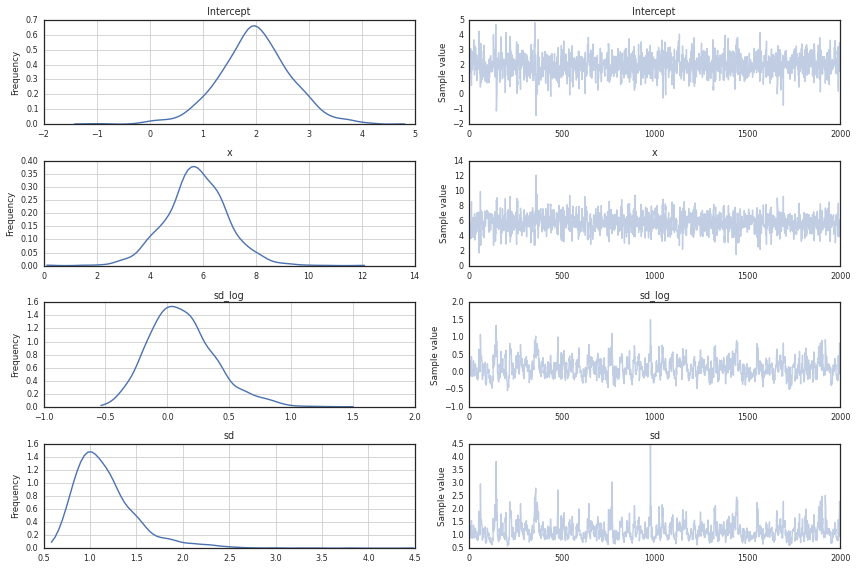

In [4]:
data = dict(x=x, y=y)

with pm.Model() as model:
    pm.glm.glm('y ~ x', data)
    step = pm.NUTS() 
    trace = pm.sample(2000, step, progressbar=True) 
    pm.traceplot(trace);

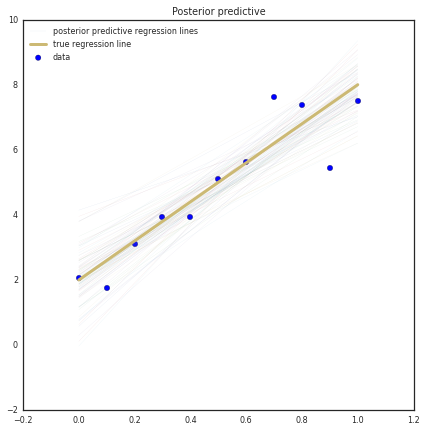

In [5]:
plt.figure(figsize=(7, 7))
plt.scatter(x, y, s=30, label='data')
pm.glm.plot_posterior_predictive(trace, samples=100, 
                                 label='posterior predictive regression lines', 
                                 c='blue', alpha=0.2)
plt.plot(x, _a*x + _b, label='true regression line', lw=3., c='red')
plt.legend(loc='best');

In [6]:
pm.glm.plot_posterior_predictive?